## Gan_on_engv3

Generate synthetic data from data_test 2011 to 2017 concatenated 

In [2]:
import numpy as np
import pandas as pd
from ctgan import CTGANSynthesizer

from sklearn import metrics
from sklearn import model_selection
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.metrics import confusion_matrix
from sklearn.metrics import accuracy_score
from sklearn.ensemble import GradientBoostingClassifier
import seaborn as sns
from sklearn.model_selection import StratifiedKFold

In [3]:
list_column = ['salaire_mensuel_cleaned', 'anciennete_emploi_cleaned',
       'anciennete_bni_cleaned', 'categorie_employeur_cleaned_UNIQUEVAL',
       'mensualite_cleaned', 'argent_journalier',
       'taux_endettement_cleaned', 'salaire_vivable',
       'nb_salaires_cleaned', 'age_end', 'age_cleaned', 'nature_CAP_cleaned_UNIQUEVAL',
       'statut_marital_cleaned_UNIQUEVAL',
       'conventionne_cleaned_UNIQUEVAL', 'type_contrat_cleaned', 'duree_pret_cleaned', 'code_DTX_cleaned_UNIQUEVAL']

In [4]:
cat_col= ['categorie_employeur_cleaned_UNIQUEVAL','nature_CAP_cleaned_UNIQUEVAL',
       'statut_marital_cleaned_UNIQUEVAL',
       'conventionne_cleaned_UNIQUEVAL', 'type_contrat_cleaned']
cat_feat= [3,11,12,13,14]
num_col= ['salaire_mensuel_cleaned', 'anciennete_emploi_cleaned',
       'anciennete_bni_cleaned',
       'mensualite_cleaned', 'argent_journalier',
       'taux_endettement_cleaned', 'salaire_vivable',
       'nb_salaires_cleaned', 'age_end', 'age_cleaned', 'duree_pret_cleaned']

In [5]:
data_train = pd.read_csv('data/Version4/data_train_engv3_new.csv', delimiter=';')
data_train=data_train[list_column]
data_val = pd.read_csv('data/Version4/data_val_engv3_new.csv', delimiter=';')
data_val=data_val[list_column]
data_test = pd.read_csv('data/Version4/data_test_engv3_new.csv', delimiter=';')
data_test=data_test[list_column]

In [6]:
X_train = data_train.drop('code_DTX_cleaned_UNIQUEVAL', axis=1)
y_train = data_train['code_DTX_cleaned_UNIQUEVAL']
X_test = data_test.drop('code_DTX_cleaned_UNIQUEVAL', axis=1)
y_test = data_test['code_DTX_cleaned_UNIQUEVAL']

### Use of CTGAN

In [10]:
def get_gan_dataset(x_train, y_train, x_test, cat_cols, gen_x_times=1.2, epochs=300):
    """
    Extends train by generating new data by GAN
    :param x_train:  train dataframe
    :param y_train: target for train dataframe
    :param x_test: dataframe
    :param cat_cols: List of categorical columns
    :param gen_x_times: Factor for which initial dataframe should be increased
    :param cat_cols: List of categorical columns
    :param epochs: Number of epoch max to train the GAN
    :return: extended train with target
    """

    if gen_x_times == 0:
        raise ValueError("Passed gen_x_times with value 0!")
    x_train["target"] = y_train
    x_test_bigger = int(1.1 * x_test.shape[0] / x_train.shape[0])
    print("x_test_bigger:",x_test_bigger)
    ctgan = CTGANSynthesizer()
    ctgan.fit(x_train, cat_cols, epochs=epochs)
    print("row numbers:",(x_test_bigger) * x_train.shape[0])
    generated_df = ctgan.sample((x_test_bigger) * x_train.shape[0])
    return generated_df



In [11]:
gan_train = get_gan_dataset(X_test,y_test,X_test,cat_col)

x_test_bigger: 1


/home/tokyaxel/.local/lib/python3.6/site-packages/sklearn/utils/validation.py:71: FutureWarning: Pass n_components=10 as keyword args. From version 0.25 passing these as positional arguments will result in an error
  FutureWarning)
/home/tokyaxel/.local/lib/python3.6/site-packages/sklearn/utils/validation.py:71: FutureWarning: Pass n_components=10 as keyword args. From version 0.25 passing these as positional arguments will result in an error
  FutureWarning)
/home/tokyaxel/.local/lib/python3.6/site-packages/sklearn/utils/validation.py:71: FutureWarning: Pass n_components=10 as keyword args. From version 0.25 passing these as positional arguments will result in an error
  FutureWarning)
/home/tokyaxel/.local/lib/python3.6/site-packages/sklearn/utils/validation.py:71: FutureWarning: Pass n_components=10 as keyword args. From version 0.25 passing these as positional arguments will result in an error
  FutureWarning)
/home/tokyaxel/.local/lib/python3.6/site-packages/sklearn/utils/validati

GAN: Early stopping after epochs 95
row numbers: 3028


In [12]:
gan_train.shape

(3028, 17)

In [13]:
data_test.shape

(3028, 17)

In [14]:
gan_train

,salaire_mensuel_cleaned,anciennete_emploi_cleaned,anciennete_bni_cleaned,categorie_employeur_cleaned_UNIQUEVAL,mensualite_cleaned,argent_journalier,taux_endettement_cleaned,salaire_vivable,nb_salaires_cleaned,age_end,age_cleaned,nature_CAP_cleaned_UNIQUEVAL,statut_marital_cleaned_UNIQUEVAL,conventionne_cleaned_UNIQUEVAL,type_contrat_cleaned,duree_pret_cleaned,target
0,339533.420186,40.956766,35.788635,0.0,21500.731073,6014.491548,31.945238,38414.433359,6.380014,38.875955,32.142769,0.0,0.0,0.0,0.0,17.221438,-0.007792
1,364798.731201,69.182816,11.387931,3.0,13853.403467,6486.023225,32.551834,-95673.208979,45.592785,45.883021,42.148322,0.0,2.0,0.0,0.0,37.121586,-0.011593
2,86340.006948,335.355808,14.153385,0.0,13053.137676,2851.327881,11.511341,77781.415824,23.301729,47.941602,31.353046,0.0,2.0,0.0,0.0,26.001320,-0.010925
3,180705.193298,274.174337,19.865058,2.0,48819.257499,6099.172958,31.227813,76039.473061,-13.860273,41.141689,38.220084,1.0,3.0,0.0,0.0,24.010701,-0.016482
4,202403.314626,121.313613,54.120579,1.0,38434.859443,6129.242384,31.099023,109374.939430,5.030973,38.072376,41.014665,0.0,0.0,0.0,0.0,35.826596,-0.004220
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
3023,341198.994490,57.733891,2.603834,3.0,30864.122266,19031.146970,30.171623,11146.522205,19.692953,29.259829,31.512889,0.0,2.0,1.0,0.0,1.516196,-0.004214
3024,660097.398584,109.296972,27.063551,1.0,18685.865325,10339.085754,32.273799,27957.789931,21.096421,35.817258,42.652222,0.0,0.0,1.0,0.0,36.054372,-0.010212
3025,252735.202269,74.242122,47.041479,1.0,53239.235630,12851.056616,32.729316,68699.947200,25.407867,29.617383,33.695894,0.0,0.0,1.0,0.0,46.276881,-0.010855
3026,653138.842356,146.533357,46.134899,1.0,43035.822176,5093.877067,10.182611,94278.148321,-5.815503,22.096407,21.497331,1.0,0.0,0.0,0.0,25.035495,-0.010834


In [17]:
data_test

,salaire_mensuel_cleaned,anciennete_emploi_cleaned,anciennete_bni_cleaned,categorie_employeur_cleaned_UNIQUEVAL,mensualite_cleaned,argent_journalier,taux_endettement_cleaned,salaire_vivable,nb_salaires_cleaned,age_end,age_cleaned,nature_CAP_cleaned_UNIQUEVAL,statut_marital_cleaned_UNIQUEVAL,conventionne_cleaned_UNIQUEVAL,type_contrat_cleaned,duree_pret_cleaned,code_DTX_cleaned_UNIQUEVAL
0,275800.00,73.0,30.0,1,90934.406378,6162.186454,32.971141,184865.593622,25.0,44.0,41.0,1,0,1,0,36,0
1,500000.00,28.0,25.0,1,164950.000000,11168.333333,32.990000,335050.000000,25.0,28.0,26.0,0,0,0,0,24,0
2,293674.06,86.0,46.0,1,94093.168824,6652.696373,32.040000,199580.891176,46.0,53.0,50.0,0,0,0,0,36,0
3,160000.00,42.0,24.0,0,52560.000000,3581.333333,32.850000,107440.000000,22.0,24.0,22.0,0,2,0,0,24,0
4,382966.00,111.0,9.0,3,125850.352980,8570.521567,32.862017,257115.647020,1.0,42.0,37.0,0,0,0,0,60,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
3023,134000.00,149.0,19.0,0,44072.600000,2997.580000,32.890000,89927.400000,18.0,32.0,30.0,0,3,0,0,24,0
3024,84373.00,103.0,28.0,1,27193.417900,1905.986070,32.230000,57179.582100,27.0,48.0,46.0,0,0,0,0,24,0
3025,373000.00,93.0,71.0,1,108505.700000,8816.476667,29.090000,264494.300000,70.0,47.0,45.0,0,1,0,0,24,0
3026,128901.80,77.0,3.0,1,41622.391220,2909.313626,32.290000,87279.408780,3.0,33.0,30.0,0,0,0,0,36,0


In [16]:
gan_train.to_csv("results/dataset_gan_test.csv",sep=";")

### Import data gan test to avoid relaunch ctgan

In [7]:
gan_train = pd.read_csv("results/dataset_gan_test.csv",sep=";")

In [16]:
data_copy = gan_train.drop(["Unnamed: 0","salaire_vivable","argent_journalier","age_end" ,"target"],axis=1)

In [17]:
data_copy['salaire_vivable'] = data_copy['salaire_mensuel_cleaned'] - data_copy['mensualite_cleaned']
data_copy['argent_journalier']= data_copy['salaire_vivable']/30
data_copy['age_end'] = data_copy['age_cleaned'] + (data_copy['duree_pret_cleaned']/12)

In [18]:
gan_xp = data_copy

### Evaluation of data_synth based on true labels

In [19]:
def evaluate(data_train, data_test, list_column):
    #Training data on all data train
    data_train_used = pd.DataFrame()
    data_train_used = data_train[list_column]
    #Training model on all data_train
    data_train_used_dum = pd.get_dummies(data_train_used)
    features_train = data_train_used_dum.drop('code_DTX_cleaned_UNIQUEVAL', axis=1)
    target_train = data_train_used_dum['code_DTX_cleaned_UNIQUEVAL']
    model = GradientBoostingClassifier(learning_rate=0.05)
    model.fit(features_train, target_train)
    
    
    data_test_dum = pd.get_dummies(data_test)
    data_test_used = pd.DataFrame()
    for column in data_train_used_dum.columns:
        try:
            data_test_used[column] = data_test_dum[column]
        except KeyError:
            data_test_used[column] = np.zeros(len(data_test_dum))
    features_test = data_test_used.drop('code_DTX_cleaned_UNIQUEVAL', axis=1)
    target_test = data_test_used['code_DTX_cleaned_UNIQUEVAL']
    pred = model.predict_proba(features_test)[:, 1]
    fpr, tpr, thresholds = metrics.roc_curve(target_test, pred)
    plt.plot(fpr, tpr)
    plt.legend(labels=[metrics.auc(fpr, tpr)])
    plt.show()

#### AUC of data_test

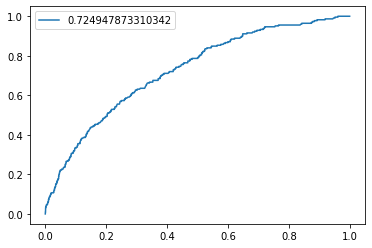

In [22]:
data = data_train
evaluate(data, data_test, list_column)

#### AUC of data_synth from data_test

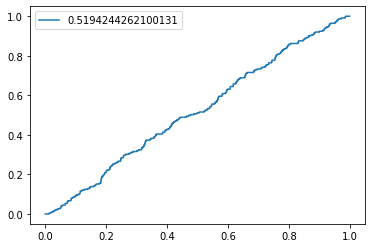

In [23]:
gan_xp['code_DTX_cleaned_UNIQUEVAL'] = data_test['code_DTX_cleaned_UNIQUEVAL']
evaluate(data, gan_xp, list_column)

### Evaluation of data_synth based on predictions